# Final Research Project

Vicky Ke & Jianying Zhu

12/08/2021

In [1]:
import yfinance as yf
from pandas_datareader import data as pdr

#basic package
import numpy as np
import pandas as pd
from tabulate import tabulate
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning package
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from dmba import regressionSummary
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

#forecasting package
from arch import arch_model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

import datetime
from time import perf_counter
import warnings
warnings.filterwarnings('ignore')

## 1. Load datasets

In [2]:
yf.pdr_override() 
msft = pdr.get_data_yahoo("MSFT", start="2000-01-01", end = '2021-12-01') 
wmt = pdr.get_data_yahoo("WMT", start="2000-01-01", end = '2021-12-01') 
pfe = pdr.get_data_yahoo("PFE", start="2000-01-01", end = '2021-12-01') 
sp500 = pdr.get_data_yahoo("^GSPC", start="2000-01-01", end = '2021-12-01') 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
msft.reset_index(inplace=True)
wmt.reset_index(inplace=True)
pfe.reset_index(inplace=True)
sp500.reset_index(inplace=True)

## 2. Check Null

In [4]:
msft.info()
wmt.info()
pfe.info()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5514 non-null   datetime64[ns]
 1   Open       5514 non-null   float64       
 2   High       5514 non-null   float64       
 3   Low        5514 non-null   float64       
 4   Close      5514 non-null   float64       
 5   Adj Close  5514 non-null   float64       
 6   Volume     5514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 301.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5514 non-null   datetime64[ns]
 1   Open       5514 non-null   float64       
 2   High       5514 non-null   float64       
 3   Low        5514 non-null   float64       
 4   Close  

## 3. Returns Calculation

### 3.1 Microsoft

In [5]:
msft['Lag Close'] = msft['Adj Close'].shift(1)
msft['Return'] = msft['Adj Close']/msft['Lag Close']-1.
msft = msft[1:] 
msft

,Date,Open,High,Low,Close,Adj Close,Volume,Lag Close,Return
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.551296,54119000,36.794220,-0.033780
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.926155,64059600,35.551296,0.010544
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.722687,54976600,35.926155,-0.033498
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,35.176453,62013600,34.722687,0.013068
5,2000-01-10,56.718750,56.843750,55.687500,56.125000,35.432922,44963600,35.176453,0.007291
...,...,...,...,...,...,...,...,...,...
5509,2021-11-23,337.049988,339.450012,333.559998,337.679993,337.679993,30427600,339.829987,-0.006327
5510,2021-11-24,336.279999,338.160004,333.910004,337.910004,337.910004,21661300,337.679993,0.000681
5511,2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200,337.910004,-0.024356
5512,2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,329.679993,0.021081


### 3.2 Walmart

In [6]:
wmt['Lag Close'] = wmt['Adj Close'].shift(1)
wmt['Return'] = wmt['Adj Close']/wmt['Lag Close']-1.
wmt = wmt[1:] 
wmt

,Date,Open,High,Low,Close,Adj Close,Volume,Lag Close,Return
1,2000-01-04,65.500000,65.812500,64.187500,64.312500,43.408829,6745100,45.096245,-0.037418
2,2000-01-05,63.875000,64.375000,62.187500,63.000000,42.522923,7018700,43.408829,-0.020408
3,2000-01-06,63.000000,64.562500,62.687500,63.687500,42.986969,6544500,42.522923,0.010913
4,2000-01-07,64.500000,68.937500,64.500000,68.500000,46.235237,7976900,42.986969,0.075564
5,2000-01-10,67.250000,67.500000,65.625000,67.250000,45.391552,6714300,46.235237,-0.018248
...,...,...,...,...,...,...,...,...,...
5509,2021-11-23,144.250000,145.979996,143.250000,145.809998,145.809998,9969300,144.779999,0.007114
5510,2021-11-24,145.729996,147.059998,145.639999,146.539993,146.539993,6029800,145.809998,0.005006
5511,2021-11-26,146.440002,147.880005,144.419998,144.899994,144.899994,7013200,146.539993,-0.011191
5512,2021-11-29,145.000000,145.250000,142.229996,142.630005,142.630005,11013200,144.899994,-0.015666


### 3.3 Pfizer

In [7]:
pfe['Lag Close'] = pfe['Adj Close'].shift(1)
pfe['Return'] = pfe['Adj Close']/pfe['Lag Close']-1.
pfe = pfe[1:] 
pfe

,Date,Open,High,Low,Close,Adj Close,Volume,Lag Close,Return
1,2000-01-04,29.648956,29.886148,28.462997,29.115274,13.776155,14208974,14.309245,-0.037255
2,2000-01-05,29.293169,30.241936,29.233871,29.589659,14.000609,12981591,13.776155,0.016293
3,2000-01-06,29.648956,31.072105,29.589659,30.657021,14.505639,11115273,14.000609,0.036072
4,2000-01-07,32.258064,33.088234,30.657021,32.732449,15.487653,17962163,14.505639,0.067699
5,2000-01-10,33.206833,33.206833,32.317364,32.673149,15.459592,10413731,15.487653,-0.001812
...,...,...,...,...,...,...,...,...,...
5509,2021-11-23,50.580002,51.450001,50.299999,51.080002,51.080002,24946200,51.200001,-0.002344
5510,2021-11-24,51.180000,51.330002,50.709999,50.889999,50.889999,18556800,51.080002,-0.003720
5511,2021-11-26,54.040001,54.939999,53.250000,54.000000,54.000000,66561300,50.889999,0.061112
5512,2021-11-29,55.150002,55.700001,52.110001,52.400002,52.400002,72660800,54.000000,-0.029630


### 3.4 S&P 500

In [8]:
sp500['Lag Close'] = sp500['Adj Close'].shift(1)
sp500['Return'] = sp500['Adj Close']/sp500['Lag Close']-1.
sp500 = sp500[1:] 
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Lag Close,Return
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1455.219971,-0.038345
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1399.420044,0.001922
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1402.109985,0.000956
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1403.449951,0.027090
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,1441.469971,0.011190
...,...,...,...,...,...,...,...,...,...
5509,2021-11-23,4678.479980,4699.390137,4652.660156,4690.700195,4690.700195,3428780000,4682.939941,0.001657
5510,2021-11-24,4675.779785,4702.870117,4659.890137,4701.459961,4701.459961,2464040000,4690.700195,0.002294
5511,2021-11-26,4664.629883,4664.629883,4585.430176,4594.620117,4594.620117,2676740000,4701.459961,-0.022725
5512,2021-11-29,4628.750000,4672.950195,4625.259766,4655.270020,4655.270020,3471380000,4594.620117,0.013200


## 4. Descriptive Analysis and Visualizations

### 4.1 Descriptive Analysis of Returns

In [9]:
desc_msft = msft["Return"].describe()
desc_wmt = wmt["Return"].describe()
desc_pfe = pfe["Return"].describe()
desc_sp = sp500["Return"].describe()

In [10]:
count=[]
mean=[]
std = []
minn = []
q25 = []
q50 = []
q75 = []
maxx = []

lst = [count,mean,std,minn,q25,q50,q75,maxx]
name_lst = [desc_msft,desc_wmt,desc_pfe,desc_sp]
measure_name = ["Count","Mean","Standard Deviation","Min","25%","50%","75%","Max"]

for j in name_lst:
    for i in range(0,len(desc_msft)):
        lst[i].append(round(j[i],5))

In [11]:
df_describe = pd.DataFrame({"Count":count,
         "Mean":mean,
         "Standard Deviation":std,
         "Min":minn,
         "25%":q25,
         "50%":q50,
         "75%":q75,
         "Max":maxx}, index=['Microsoft', 'Walmart', 'Pfizer',"S&P 500"])
print(tabulate(df_describe,headers="keys", tablefmt="fancy_grid"))

╒═══════════╤═════════╤═════════╤══════════════════════╤══════════╤══════════╤═════════╤═════════╤═════════╕
│           │   Count │    Mean │   Standard Deviation │      Min │      25% │     50% │     75% │     Max │
╞═══════════╪═════════╪═════════╪══════════════════════╪══════════╪══════════╪═════════╪═════════╪═════════╡
│ Microsoft │    5513 │ 0.00058 │              0.01926 │ -0.15598 │ -0.00803 │ 0.00037 │ 0.0092  │ 0.19565 │
├───────────┼─────────┼─────────┼──────────────────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ Walmart   │    5513 │ 0.00032 │              0.01493 │ -0.10183 │ -0.00666 │ 0.00025 │ 0.00691 │ 0.11709 │
├───────────┼─────────┼─────────┼──────────────────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ Pfizer    │    5513 │ 0.00037 │              0.01585 │ -0.11146 │ -0.00722 │ 0       │ 0.00793 │ 0.10855 │
├───────────┼─────────┼─────────┼──────────────────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ S&P 500   │    55

### 4.2 Histogram of Returns 

Text(0.5, 1.0, 'Microsoft')

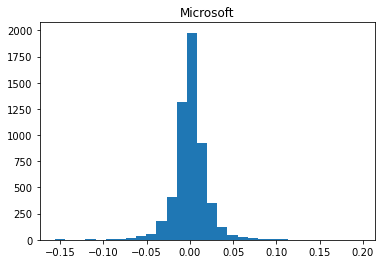

In [12]:
plt.hist(msft["Return"], bins=30)
plt.title("Microsoft")

Text(0.5, 1.0, 'Walmart')

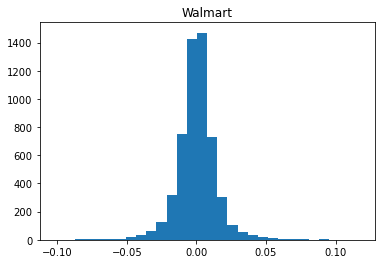

In [13]:
plt.hist(wmt["Return"], bins=30)
plt.title("Walmart")

Text(0.5, 1.0, 'Pfizer')

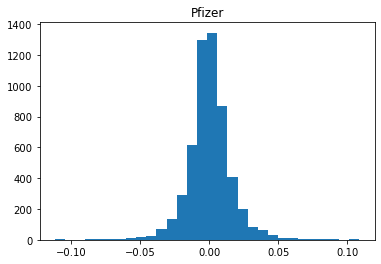

In [14]:
plt.hist(pfe["Return"], bins=30)
plt.title("Pfizer")

Text(0.5, 1.0, 'S&P 500')

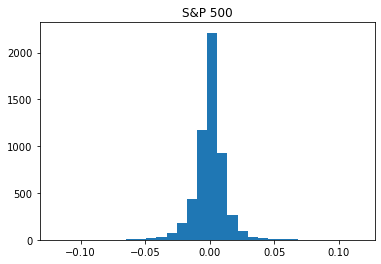

In [15]:
plt.hist(sp500["Return"], bins=30)
plt.title("S&P 500")

### 4.3 Box Plot

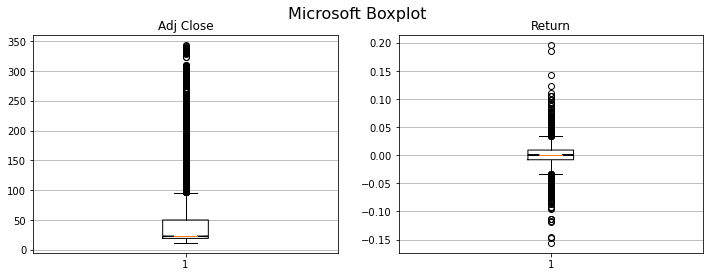

In [16]:
#msft
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4, 3))

fig1.set_figheight(4)
fig1.set_figwidth(12)
fig1.suptitle('Microsoft Boxplot', fontsize=16)

ax1.set_title('Adj Close')
ax1.boxplot(msft['Adj Close'], notch=True)

ax2.set_title('Return')
ax2.boxplot(msft.Return, notch=True)

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

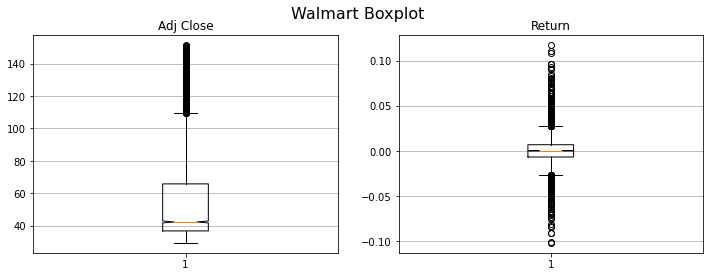

In [17]:
#wmt
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4, 3))

fig2.set_figheight(4)
fig2.set_figwidth(12)
fig2.suptitle('Walmart Boxplot', fontsize=16)

ax1.set_title('Adj Close')
ax1.boxplot(wmt['Adj Close'], notch=True)

ax2.set_title('Return')
ax2.boxplot(wmt.Return, notch=True)

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

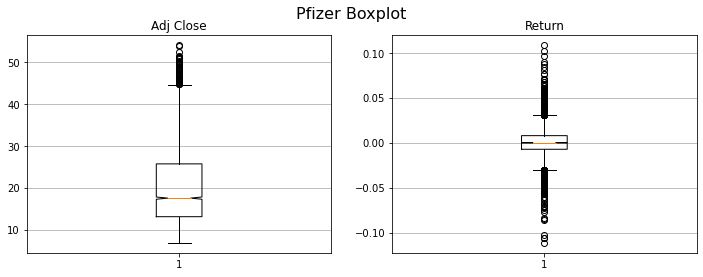

In [18]:
#pfe
fig3, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4, 3))

fig3.set_figheight(4)
fig3.set_figwidth(12)
fig3.suptitle('Pfizer Boxplot', fontsize=16)

ax1.set_title('Adj Close')
ax1.boxplot(pfe['Adj Close'], notch=True)

ax2.set_title('Return')
ax2.boxplot(pfe.Return, notch=True)

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

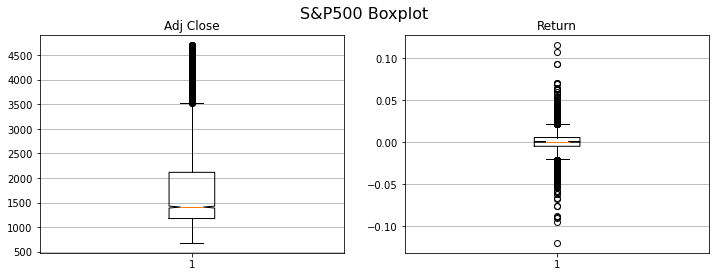

In [19]:
#sp500
fig4, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4, 3))

fig4.set_figheight(4)
fig4.set_figwidth(12)
fig4.suptitle('S&P500 Boxplot', fontsize=16)

ax1.set_title('Adj Close')
ax1.boxplot(sp500['Adj Close'], notch=True)

ax2.set_title('Return')
ax2.boxplot(sp500.Return, notch=True)

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

### 4.4 Violin Chart

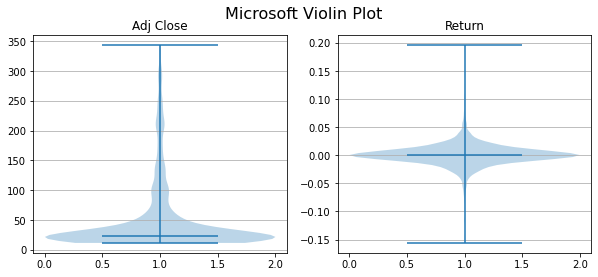

In [20]:
#msft
# Create figure with three axes
fig5, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig5.set_figheight(4)
fig5.set_figwidth(10)
fig5.suptitle('Microsoft Violin Plot', fontsize=16)

# Plot violin plot on axes 1
ax1.violinplot(msft['Adj Close'], widths = 2, showmedians=True)
ax1.set_title('Adj Close')

# Plot violin plot on axes 2
ax2.violinplot(msft.Return, widths = 2, showmedians=True)
ax2.set_title('Return')

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

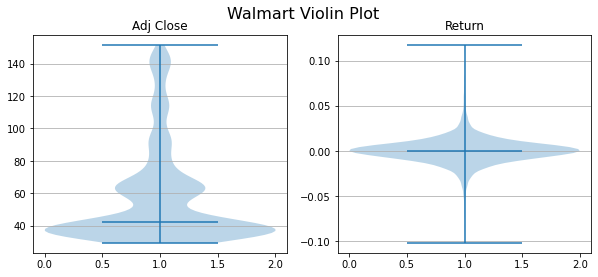

In [21]:
#wmt
# Create figure with three axes
fig6, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig6.set_figheight(4)
fig6.set_figwidth(10)
fig6.suptitle('Walmart Violin Plot', fontsize=16)

# Plot violin plot on axes 1
ax1.violinplot(wmt['Adj Close'], widths = 2, showmedians=True)
ax1.set_title('Adj Close')

# Plot violin plot on axes 2
ax2.violinplot(wmt.Return, widths = 2, showmedians=True)
ax2.set_title('Return')

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

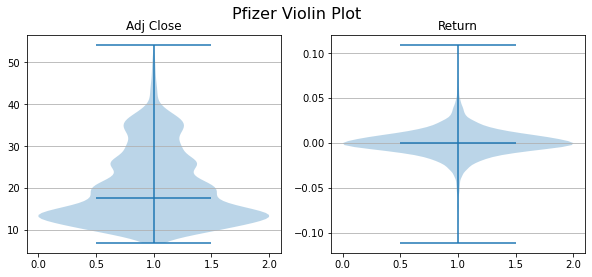

In [22]:
#pfe
# Create figure with three axes
fig7, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig7.set_figheight(4)
fig7.set_figwidth(10)
fig7.suptitle('Pfizer Violin Plot', fontsize=16)

# Plot violin plot on axes 1
ax1.violinplot(pfe['Adj Close'], widths = 2, showmedians=True)
ax1.set_title('Adj Close')

# Plot violin plot on axes 2
ax2.violinplot(pfe.Return, widths = 2, showmedians=True)
ax2.set_title('Return')

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

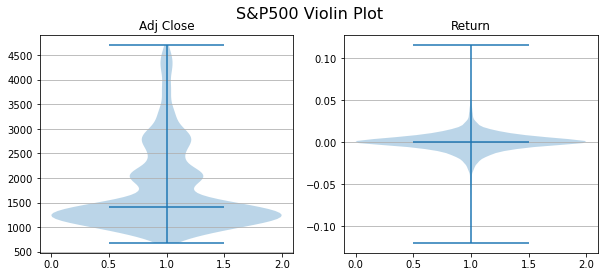

In [23]:
#sp500
# Create figure with three axes
fig8, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig8.set_figheight(4)
fig8.set_figwidth(10)
fig8.suptitle('S&P500 Violin Plot', fontsize=16)

# Plot violin plot on axes 1
ax1.violinplot(sp500['Adj Close'], widths = 2, showmedians=True)
ax1.set_title('Adj Close')

# Plot violin plot on axes 2
ax2.violinplot(sp500.Return, widths = 2, showmedians=True)
ax2.set_title('Return')

# add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

### 4.5 Scatter plot of Return

In [24]:
concat_df = pd.concat([msft.assign(dataset='msft'), wmt.assign(dataset='wmt'), pfe.assign(dataset='pfe'), sp500.assign(dataset='sp500')])

In [25]:
concat_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Lag Close', 'Return', 'dataset'],
      dtype='object')

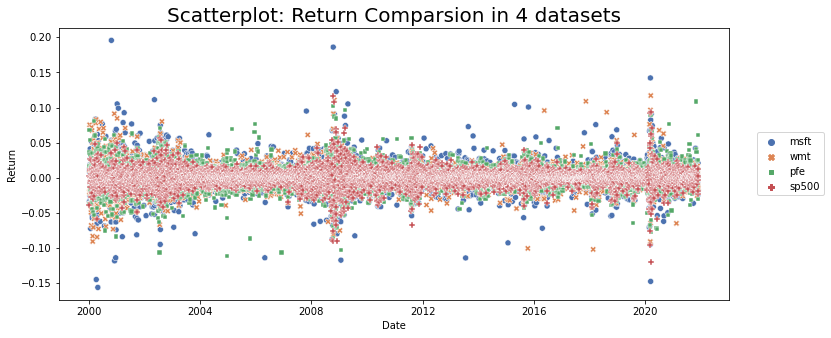

In [26]:
#
plt.figure(figsize = (12,5)) 
scatter = sns.scatterplot(x='Date', y='Return', data=concat_df, hue='dataset', style='dataset', legend='brief', sizes=(100, 50), palette = "deep")
scatter.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
scatter.set_title(label ='Scatterplot: Return Comparsion in 4 datasets', fontsize=20)
plt.show()

## 5. Machine Learning Models

### 5.1 Split and combine the datasets

In [27]:
concat_df1 = pd.concat([msft["Date"],msft["Return"], wmt["Return"],pfe["Return"],sp500["Return"],msft["Adj Close"],wmt["Adj Close"],pfe["Adj Close"],sp500["Adj Close"]], axis=1)
df = concat_df1.set_axis(['Date', 'msft_Return', 'wmt_Return',"pfe_Return","sp500_Return",'msft_AdjClose','wmt_AdjClose','pfe_AdjClose','sp500_AdjClose'], axis=1, inplace=False)

### 5.2 Train Test Split

In [28]:
#set x and y
X = df.iloc[:,1:4]
y = df.iloc[:,[4]]

In [29]:
# time series train test split 
len_data = len(y)
train_size = int(len_data * 0.80)

In [30]:
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:len_data],y[0:train_size], y[train_size:len_data]

In [31]:
# set standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5.3 Fit the data with models

#### 5.3.1 Lasso

In [32]:
#start timer
startTime = perf_counter()

alpha_lasso = np.arange(start=0.0001, stop=0.01, step=0.0001)
length_lasso1 = len(alpha_lasso)
lasso_trainScore1 = []
lasso_testScore1 = []

for i in range(length_lasso1):
    lasso = Lasso(alpha=alpha_lasso[i])
    lasso.fit(X_train, y_train)
    y_pred_lasso_train = lasso.predict(X_train)
    y_pred_lasso_test = lasso.predict(X_test)
    #Using cross validation
    cv_lasso = cross_val_score(lasso, X_test, y_test, cv=10, scoring = 'r2')
    
    #store train accuracy
    lasso_trainScore1.append(lasso.score(X_train, y_train))

    #store test accuracy
    lasso_testScore1.append(lasso.score(X_test, y_test))

print("-------------------------------")
print("Lasso Regression: ")
print("-------------------------------")

fullsmp_lasso = lasso.score(X, y)
print("Full sample R-squared:", fullsmp_lasso)
print(" ")

dataframe_lasso = {'Alpha': alpha_lasso,
             'Train Set Score': lasso_trainScore1,
             'Test Set Score': lasso_testScore1}

table_lasso = pd.DataFrame(dataframe_lasso)
table_lasso.index += 1

table_lasso = table_lasso.sort_values("Test Set Score", ascending=False)
display(table_lasso)

-------------------------------
Lasso Regression: 
-------------------------------
Full sample R-squared: -5.2690468363092435e-05
 


,Alpha,Train Set Score,Test Set Score
1,0.0001,0.637062,0.705361
2,0.0002,0.636704,0.703712
3,0.0003,0.636107,0.701851
4,0.0004,0.635272,0.699777
5,0.0005,0.634199,0.697490
...,...,...,...
85,0.0085,0.000000,-0.001238
84,0.0084,0.000000,-0.001238
83,0.0083,0.000000,-0.001238
82,0.0082,0.000000,-0.001238


In [33]:
# choose the best parameter with cross-validation
lasso2 = Lasso(alpha = 0.0001)
lasso2.fit(X_train, y_train)

cv_lasso2 = cross_validate(lasso2, X_test, y_test, cv=10, scoring = 'r2', return_train_score=True)
lasso2_train = np.mean(cv_lasso2['train_score'])
lasso2_test = np.mean(cv_lasso2['test_score'])

print('Train Score',"{:.4%}".format(lasso2_train))
print('Test Score',"{:.4%}".format(lasso2_test))

Train Score 76.1503%
Test Score 59.1094%


#### 5.3.2 Ridge

In [34]:
#start timer
startTime = perf_counter()

alpha_ridge = np.arange(start=0.05,stop=10.0,step=0.1)
length_ridge1 = len(alpha_ridge)
ridge_trainScore1 = []
ridge_testScore1 = []


for i in range(length_ridge1):
    ridge = Ridge(alpha=alpha_ridge[i])
    ridge.fit(X_train, y_train)
    y_pred_ridge_train = ridge.predict(X_train)
    y_pred_ridge_test = ridge.predict(X_test)
    #Using cross validation
    cv_ridge = cross_val_score(ridge, X, y, cv=10, scoring = 'r2')
    #store train accuracy
    ridge_trainScore1.append(ridge.score(X_train, y_train))
    #store test accuracy
    ridge_testScore1.append(ridge.score(X_test, y_test))

print("-------------------------------")
print("Ridge Regression: ")
print("-------------------------------")

fullsmp_ridge = ridge.score(X, y)
print("Full sample R-squared:", fullsmp_ridge)
print(" ")

dataframe_ridge = {'Alpha': alpha_ridge,
             'Train Set Score': ridge_trainScore1,
             'Test Set Score': ridge_testScore1}


table_ridge = pd.DataFrame(dataframe_ridge)
table_ridge.index += 1
table_ridge = table_ridge.sort_values("Test Set Score", ascending=False)
display(table_ridge)

-------------------------------
Ridge Regression: 
-------------------------------
Full sample R-squared: 0.02217565163261992
 


,Alpha,Train Set Score,Test Set Score
1,0.05,0.637181,0.706795
2,0.15,0.637181,0.706793
3,0.25,0.637181,0.706790
4,0.35,0.637181,0.706787
5,0.45,0.637181,0.706784
...,...,...,...
96,9.55,0.637180,0.706523
97,9.65,0.637180,0.706520
98,9.75,0.637180,0.706517
99,9.85,0.637180,0.706514


In [35]:
# choose the best parameter with cross-validation
ridge2 = Ridge(alpha = 0.05)
ridge2.fit(X_train, y_train)

cv_ridge2 = cross_validate(ridge2, X_test, y_test, cv=10, scoring = 'r2', return_train_score=True)
ridge2_train = np.mean(cv_ridge2['train_score'])
ridge2_test = np.mean(cv_ridge2['test_score'])

print('Train Score',"{:.4%}".format(ridge2_train))
print('Test Score',"{:.4%}".format(ridge2_test))

Train Score 76.1632%
Test Score 58.7501%


#### 5.3.3 Random Forest Regressor

In [36]:
param_grid = [{'n_estimators': [3,10,30,50,70,90,100,300,500], 'max_features': [2, 4, 6, 8]}]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 70, 90, 100, 300,
                                           500]}],
             return_train_score=True, scoring='r2')

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=300, random_state=42)

In [38]:
forest = RandomForestRegressor(max_features=2, n_estimators=300, random_state=42).fit(X_train,y_train)
forest_train = round(forest.score(X_train,y_train),4)
forest_test = round(forest.score(X_test, y_test),4)

#### 5.3.4 Gradient Boosting Regressor

In [39]:
param_grid2 = [{'n_estimators': [3,10,30,50,70,90,100,300,500], 'max_features': [2, 4, 6, 8]}]

gbmc_reg = GradientBoostingRegressor(random_state=42)

# train across 5 folds 
gbmc_grid_search = GridSearchCV(gbmc_reg, param_grid2, cv=5,
                           scoring='r2',
                           return_train_score=True)
gbmc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 70, 90, 100, 300,
                                           500]}],
             return_train_score=True, scoring='r2')

In [40]:
gbmc_grid_search.best_estimator_

GradientBoostingRegressor(max_features=2, n_estimators=30, random_state=42)

In [41]:
gbmc = GradientBoostingRegressor(max_features=2, n_estimators=30,random_state=42,verbose=False).fit(X_train,y_train)
gbmc_train = round(gbmc.score(X_train,y_train),4)
gbmc_test = round(gbmc.score(X_test, y_test),4)

#### 5.3.5 Overview of train and test score

In [42]:
table = [["Models",'Train score','Test score'],
         ["Lasso Regression",round(lasso2_train,4),round(lasso2_test,4)],
         ["Ridge Regression",round(ridge2_train,4),round(ridge2_test,4)],
         ["Random Forest Regressor",forest_train,forest_test],
         ["Gradient Boosting Regressor",gbmc_train,gbmc_test]]
print(tabulate(table,headers="firstrow", tablefmt="fancy_grid"))

╒═════════════════════════════╤═══════════════╤══════════════╕
│ Models                      │   Train score │   Test score │
╞═════════════════════════════╪═══════════════╪══════════════╡
│ Lasso Regression            │        0.7615 │       0.5911 │
├─────────────────────────────┼───────────────┼──────────────┤
│ Ridge Regression            │        0.7616 │       0.5875 │
├─────────────────────────────┼───────────────┼──────────────┤
│ Random Forest Regressor     │        0.9498 │       0.7376 │
├─────────────────────────────┼───────────────┼──────────────┤
│ Gradient Boosting Regressor │        0.6984 │       0.7276 │
╘═════════════════════════════╧═══════════════╧══════════════╛


In [43]:
#Transfer to Dataframe
df1 = pd.DataFrame(table)
df1.columns = df1.iloc[0]
df1 = df1[1:]

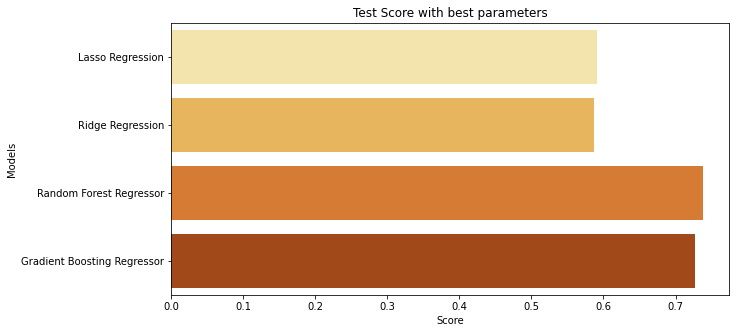

In [44]:
#Models Comparison
plt.subplots(figsize=(10, 5))
sns.barplot(x='Test score', y='Models', data=df1, palette = sns.color_palette("YlOrBr", 4)) #YlOrBr/afmhot_r/gist_heat_r
plt.xlabel("Score")
plt.ylabel("Models")
plt.title('Test Score with best parameters')
plt.show()


## 6. Forecasting Models

### 6.1 S&P 500 

#### 6.1.1 Train test split

In [45]:
#select y data as sp adj close
y = df.iloc[:,[0, -1]]
y = y.set_index(list(df)[0])

#set train size to 90%
len_data = len(y)
n_train = int(len_data * 0.80)

#train test split
train, test = y[0:n_train], y[n_train:len_data]

#set test size
n_test = len(test)

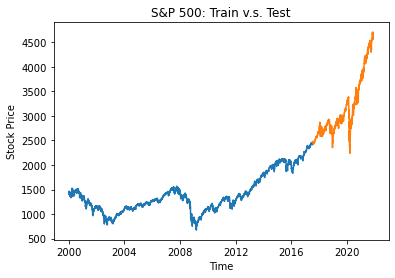

In [46]:
plt.plot(train)
plt.plot(test)

plt.title('S&P 500: Train v.s. Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#### 6.1.2 Making a Stationary time series data ready for forecasting 

##### 6.1.2.1 pacf and acf graph

S&P 500: 


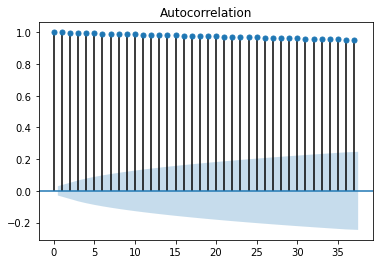

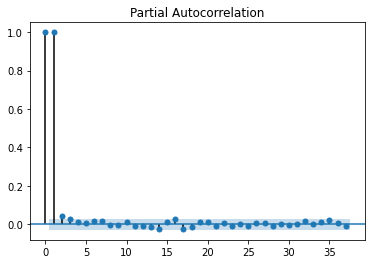

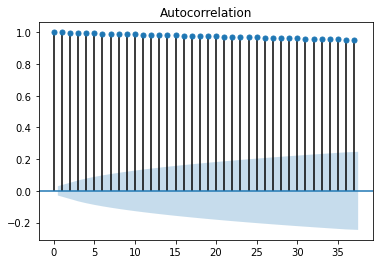

In [47]:
print('S&P 500: ')
plot_pacf(train)
plot_acf(train)

##### 6.1.2.2 Dickey–Fuller Test - Checking for the stationarity

In [48]:
result = adfuller(y)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 2.895631174838361
p-value: 1.0
Critical Values:
	1%: -3.431542773561835
	5%: -2.8620670871931293
	10%: -2.567050567388145


#### 6.1.3 Return 

##### 6.1.3.1 Log Transformation 

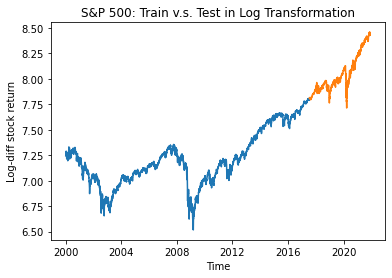

In [49]:
train_log = np.log(train)
test_log = np.log(test)

plt.plot(train_log)
plt.plot(test_log)

plt.title('S&P 500: Train v.s. Test in Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

##### 6.1.3.2 Log & Time shift Transformation 

In [50]:
train_log_shift = train_log - train_log.shift()
train_log_shift.dropna(inplace=True)

test_log_shift = test_log - test_log.shift()
test_log_shift.dropna(inplace=True)

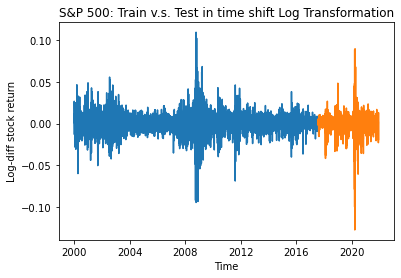

In [51]:
plt.plot(train_log_shift)
plt.plot(test_log_shift)

plt.title('S&P 500: Train v.s. Test in time shift Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

#### 6.1.4 Run Auto ARIMA find the best model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22897.569, Time=1.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24231.700, Time=1.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-25730.062, Time=4.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22899.569, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-25850.637, Time=6.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-25748.593, Time=5.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-25977.468, Time=3.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-25983.095, Time=2.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-26058.819, Time=4.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-26026.958, Time=3.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=2.50 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 36.856 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:  

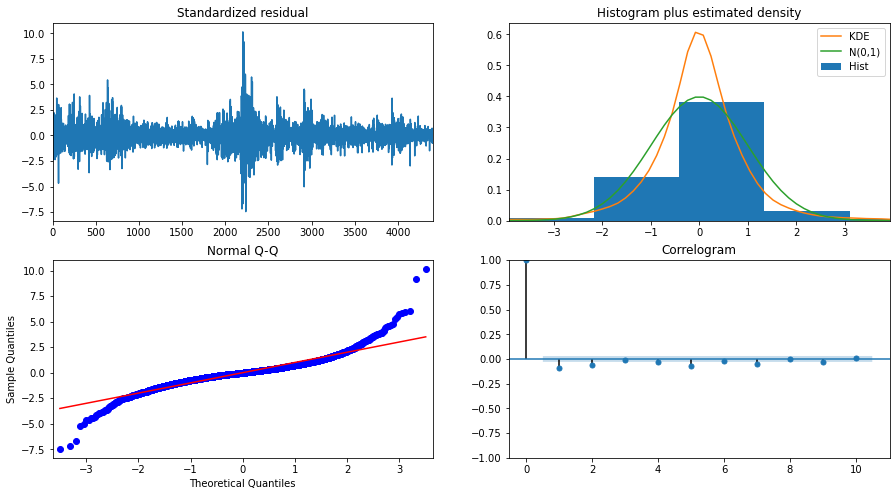

In [52]:
model_autoARIMA = auto_arima(train_log_shift, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

#### 6.1.5 Use the best model ARIMA(0,1,3) to fit the training data

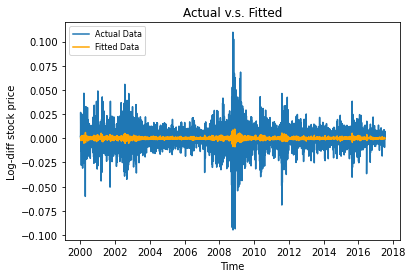

In [53]:
ARMAmodel = ARIMA(train_log, order = (0, 1, 3))
prediction_model = ARMAmodel.fit(disp=-1)
plt.plot(train_log_shift,label='Actual Data')
plt.plot(prediction_model.fittedvalues, color='orange',label='Fitted Data')

plt.title('Actual v.s. Fitted')
plt.xlabel('Time')
plt.ylabel('Log-diff stock price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 6.1.6 Prediction and the comparation with the testing data

In [54]:
start=len(train)
end=len(train)+len(test)-1
pred = prediction_model.predict(start = start,end=end,dynamic= True)

In [55]:
predictions_ARIMA_diff = pd.Series(pred.values, copy=True)
predictions_ARIMA_diff_cumsum = pred.values.cumsum()
predictions_ARIMA_log = pd.Series(test_log['sp500_AdjClose'], index=test_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [56]:
prediction = pd.DataFrame(predictions_ARIMA,index = test.index)
prediction.columns = ["sp500_predicted_returns"]
prediction

,sp500_predicted_returns
Date,
2017-07-17,2458.395524
2017-07-18,2459.607859
2017-07-19,2473.318513
2017-07-20,2473.254293
2017-07-21,2472.660206
...,...
2021-11-23,5394.288244
2021-11-24,5407.352442
2021-11-26,5285.146218


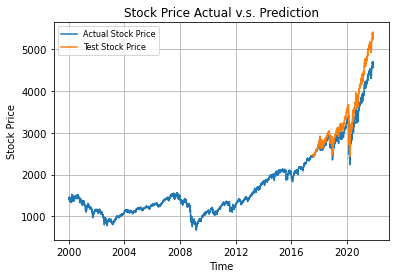

In [57]:
plt.plot(y, label='Actual Stock Price')
plt.plot(predictions_ARIMA,label='Test Stock Price')
plt.title('Stock Price Actual v.s. Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

#### 6.1.7 Prediction Accuracy

In [58]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    table2 = [["Accuracy Measurements",'Value'],
             ["Mean Absolute Percentage Error",round(mape,4)],
             ["Mean Error",round(me,4)],
             ["Mean Absolute Error",round(mae,4)],
             ["Mean Percentage Error",round(mpe,4)],
             ["Root Mean Squared Error",round(rmse,4)]]
    print(tabulate(table2,headers="firstrow", tablefmt="fancy_grid"))

In [59]:
forecast_accuracy(predictions_ARIMA, test["sp500_AdjClose"].values)

╒════════════════════════════════╤══════════╕
│ Accuracy Measurements          │    Value │
╞════════════════════════════════╪══════════╡
│ Mean Absolute Percentage Error │   0.0733 │
├────────────────────────────────┼──────────┤
│ Mean Error                     │ 257.287  │
├────────────────────────────────┼──────────┤
│ Mean Absolute Error            │ 257.292  │
├────────────────────────────────┼──────────┤
│ Mean Percentage Error          │   0.0733 │
├────────────────────────────────┼──────────┤
│ Root Mean Squared Error        │ 322.33   │
╘════════════════════════════════╧══════════╛


#### 6.1.8 One Month Forecasting for Future Stock Price

In [60]:
# set forecasting period
avg_trading_day_in_month = 21

#forecast log diff price using forecasting period
start=len(train)
end=len(train)+len(test)-1 + avg_trading_day_in_month
pred = prediction_model.predict(start = start,end=end,dynamic= True)
one_month_pred = pred[len(test):]

In [61]:
#transform log diff price into normal price

predictions_cumsum = one_month_pred.values.cumsum()
prediction_log = []
last_log_price = test_log[-1:]["sp500_AdjClose"][0]
for i in predictions_cumsum:
    last_log_price += i
    prediction_log.append(last_log_price)
one_month_prediction_price = np.exp(prediction_log)

In [62]:
# add date index
future_days = pd.date_range(start = "2021-12-1", periods = avg_trading_day_in_month).to_pydatetime().tolist()

#date format
date_range = []
for i in range(1,avg_trading_day_in_month+1):
    date_str = "2021"+"-"+"12"+"-"+str(i)
    format1 = '%Y-%m-%d'
    date_format = datetime.datetime.strptime(date_str, format1).date()
    date_range.append(date_format)

In [63]:
#show forecated value

one_month_prediction = pd.DataFrame(one_month_prediction_price, index = date_range)
one_month_prediction.columns = ["sp500_forecast_returns"]
one_month_prediction

,sp500_forecast_returns
2021-12-01,4567.583270
2021-12-02,4568.750033
2021-12-03,4570.500737
2021-12-04,4572.836052
2021-12-05,4575.756874
2021-12-06,4579.264323
2021-12-07,4583.359745
2021-12-08,4588.044712
2021-12-09,4593.321025
2021-12-10,4599.190711


In [64]:
# end one month value
one_month_end_value = round(one_month_prediction_price[-1:][0],2)
print("S&P 500 Stock Price forecasting after one month: $", one_month_end_value)

S&P 500 Stock Price forecasting after one month: $ 4703.73


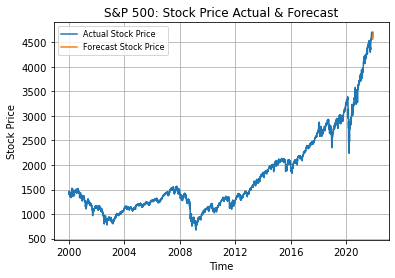

In [65]:
# plot the forecasted value with actual value

plt.plot(y, label='Actual Stock Price')
plt.plot(one_month_prediction,label='Forecast Stock Price')
plt.title('S&P 500: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

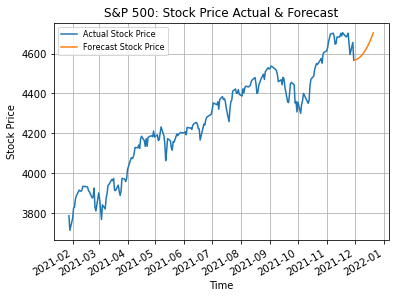

In [66]:
# larger view

plt.plot(y[5300:], label='Actual Stock Price')
plt.plot(one_month_prediction,label='Forecast Stock Price')
plt.title('S&P 500: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

### 6.2 Microsoft

#### 6.2.1 Train test split

In [67]:
#select y data as sp adj close
y2 = df.iloc[:,[0, 5]]
y2 = y2.set_index(list(df)[0])

#set train size to 90%
len_data2 = len(y2)
n_train2 = int(len_data2 * 0.80)

#train test split
train2, test2 = y2[0:n_train2], y2[n_train2:len_data2]

#set test size
n_test2 = len(test2)

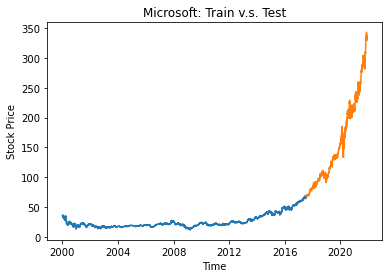

In [68]:
plt.plot(train2)
plt.plot(test2)

plt.title('Microsoft: Train v.s. Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#### 6.2.2 Making a Stationary time series data ready for forecasting 

##### 6.2.2.1 pacf and acf graph

Microsoft: 


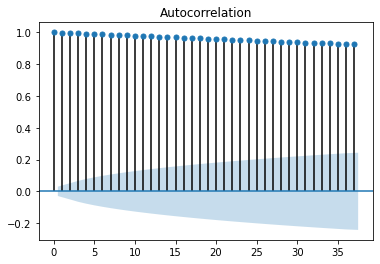

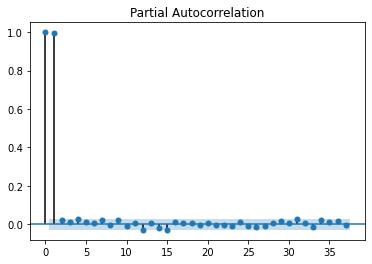

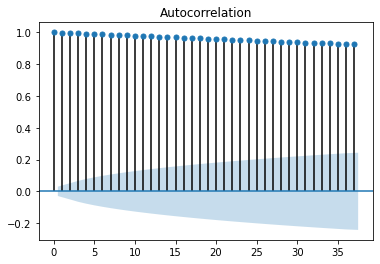

In [69]:
print('Microsoft: ')
plot_pacf(train2)
plot_acf(train2)

##### 6.2.2.2 Dickey–Fuller Test - Checking for the stationarity

In [70]:
result2 = adfuller(y2)
print('ADF Statistic: {}'.format(result2[0]))
print('p-value: {}'.format(result2[1]))
print('Critical Values:')
for key, value in result2[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 9.9945461181681
p-value: 1.0
Critical Values:
	1%: -3.4315429911644197
	5%: -2.8620671833325235
	10%: -2.5670506185662583


#### 6.2.3 Return 

##### 6.2.3.1 Log Transformation 

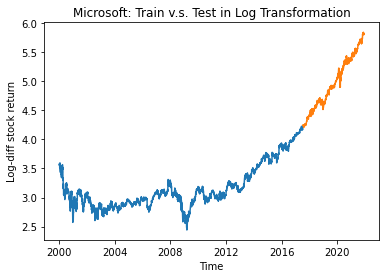

In [71]:
train_log2 = np.log(train2)
test_log2 = np.log(test2)

plt.plot(train_log2)
plt.plot(test_log2)

plt.title('Microsoft: Train v.s. Test in Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

##### 6.2.3.2 Log & Time shift Transformation 

In [72]:
train_log_shift2 = train_log2 - train_log2.shift()
train_log_shift2.dropna(inplace=True)

test_log_shift2 = test_log2 - test_log2.shift()
test_log_shift2.dropna(inplace=True)

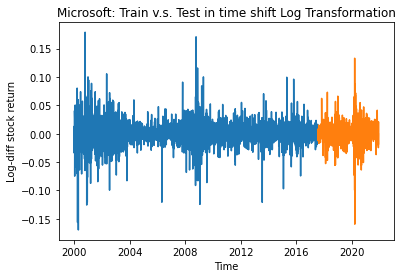

In [73]:
plt.plot(train_log_shift2)
plt.plot(test_log_shift2)

plt.title('Microsoft: Train v.s. Test in time shift Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

#### 6.2.4 Run Auto ARIMA find the best model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18954.433, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20274.384, Time=2.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18956.433, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-20811.702, Time=1.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-21057.430, Time=3.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-21989.247, Time=8.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21629.649, Time=2.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-21942.034, Time=4.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21859.688, Time=3.66 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=3.42 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 41.119 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:         

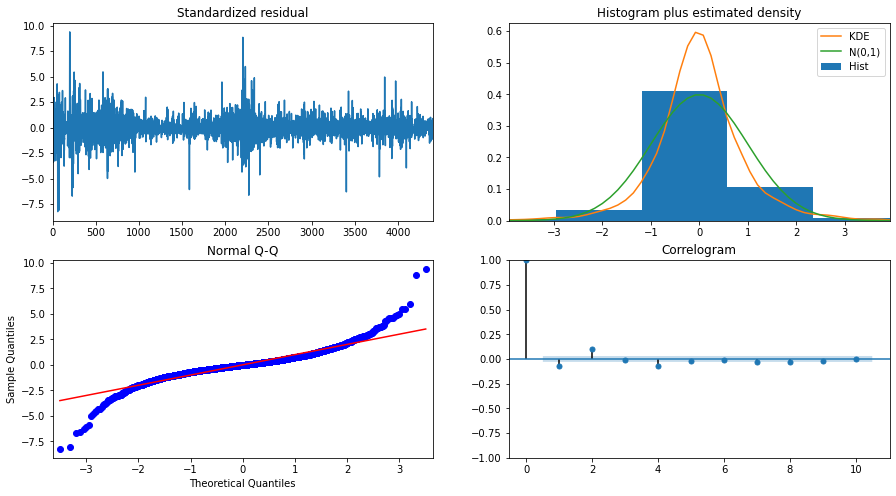

In [74]:
model_autoARIMA2 = auto_arima(train_log_shift2, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA2.summary())
model_autoARIMA2.plot_diagnostics(figsize=(15,8))
plt.show()

#### 6.2.5 Use the best model ARIMA(3,1,1) to fit the training data

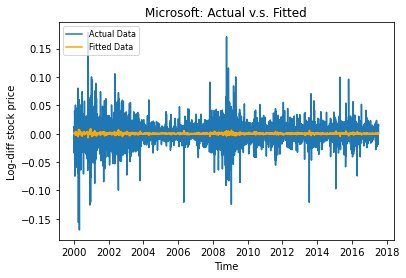

In [75]:
ARMAmodel2 = ARIMA(train_log2, order = (3, 1, 1))
prediction_model2 = ARMAmodel2.fit(disp=-1)
plt.plot(train_log_shift2,label='Actual Data')
plt.plot(prediction_model2.fittedvalues, color='orange',label='Fitted Data')

plt.title('Microsoft: Actual v.s. Fitted')
plt.xlabel('Time')
plt.ylabel('Log-diff stock price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 6.2.6 Prediction and the comparation with the testing data

In [76]:
start2=len(train2)
end2=len(train2)+len(test2)-1
pred2 = prediction_model2.predict(start = start2,end=end2,dynamic= True)

In [77]:
predictions_ARIMA_diff2 = pd.Series(pred2.values, copy=True)
predictions_ARIMA_diff_cumsum2 = pred2.values.cumsum()
predictions_ARIMA_log2 = pd.Series(test_log2['msft_AdjClose'], index=test_log2.index)
predictions_ARIMA_log2 = predictions_ARIMA_log2.add(predictions_ARIMA_diff_cumsum2, fill_value=0)
predictions_ARIMA2 = np.exp(predictions_ARIMA_log2)

In [78]:
prediction2 = pd.DataFrame(predictions_ARIMA2,index = test2.index)
prediction2.columns = ["msft_predicted_returns"]
prediction2

,msft_predicted_returns
Date,
2017-07-17,68.913155
2017-07-18,68.812511
2017-07-19,69.299827
2017-07-20,69.626868
2017-07-21,69.225199
...,...
2021-11-23,395.928557
2021-11-24,396.256921
2021-11-26,386.663090


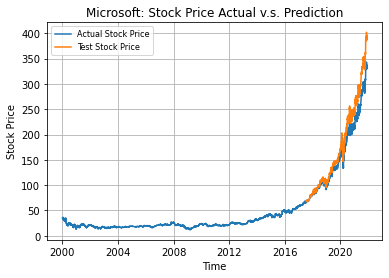

In [79]:
plt.plot(y2, label='Actual Stock Price')
plt.plot(predictions_ARIMA2,label='Test Stock Price')
plt.title('Microsoft: Stock Price Actual v.s. Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

#### 6.2.7 One Month Forecasting for Future Stock Price

In [80]:
# set forecasting period
avg_trading_day_in_month = 21

#forecast log diff price using forecasting period
start2=len(train2)
end2=len(train2)+len(test2)-1 + avg_trading_day_in_month
pred2 = prediction_model2.predict(start = start2,end=end2,dynamic= True)
one_month_pred2 = pred2[len(test2):]

In [81]:
#transform log diff price into normal price

predictions_cumsum2 = one_month_pred2.values.cumsum()
prediction_log2 = []
last_log_price2 = test_log2[-1:]["msft_AdjClose"][0]
for i in predictions_cumsum2:
    last_log_price2 += i
    prediction_log2.append(last_log_price2)
one_month_prediction_price2 = np.exp(prediction_log2)

In [82]:
# add date index
future_days2 = pd.date_range(start = "2021-12-1", periods = avg_trading_day_in_month).to_pydatetime().tolist()

#date format
date_range2 = []
for i in range(1,avg_trading_day_in_month+1):
    date_str = "2021"+"-"+"12"+"-"+str(i)
    format1 = '%Y-%m-%d'
    date_format2 = datetime.datetime.strptime(date_str, format1).date()
    date_range2.append(date_format2)

In [83]:
#show forecated value

one_month_prediction2 = pd.DataFrame(one_month_prediction_price2, index = date_range2)
one_month_prediction2.columns = ["msft_forecast_returns"]
one_month_prediction2

,msft_forecast_returns
2021-12-01,330.638957
2021-12-02,330.736899
2021-12-03,330.883867
2021-12-04,331.079926
2021-12-05,331.325163
2021-12-06,331.619687
2021-12-07,331.963629
2021-12-08,332.357143
2021-12-09,332.800404
2021-12-10,333.293609


In [84]:
# end one month value
one_month_end_value2 = round(one_month_prediction_price2[-1:][0],2)
print("Microsoft Stock Price forecasting after one month: $", one_month_end_value2)

Microsoft Stock Price forecasting after one month: $ 342.09


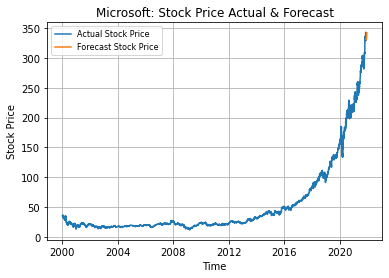

In [85]:
# plot the forecasted value with actual value

plt.plot(y2, label='Actual Stock Price')
plt.plot(one_month_prediction2, label='Forecast Stock Price')
plt.title('Microsoft: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

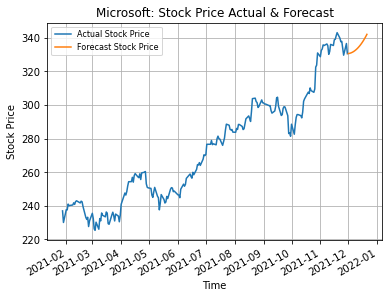

In [86]:
# larger view

plt.plot(y2[5300:], label='Actual Stock Price')
plt.plot(one_month_prediction2,label='Forecast Stock Price')
plt.title('Microsoft: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

### 6.3 Walmart

#### 6.3.1 Train test split

In [87]:
#select y data as sp adj close
y3 = df.iloc[:,[0, 6]]
y3 = y3.set_index(list(df)[0])

#set train size to 90%
len_data3 = len(y)
n_train3 = int(len_data3 * 0.80)

#train test split
train3, test3 = y3[0:n_train3], y3[n_train3:len_data3]

#set test size
n_test3 = len(test3)

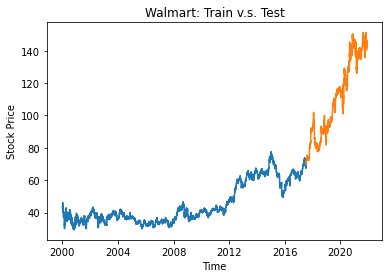

In [88]:
plt.plot(train3)
plt.plot(test3)

plt.title('Walmart: Train v.s. Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#### 6.3.2 Making a Stationary time series data ready for forecasting 

##### 6.3.2.1 pacf and acf graph

Walmart: 


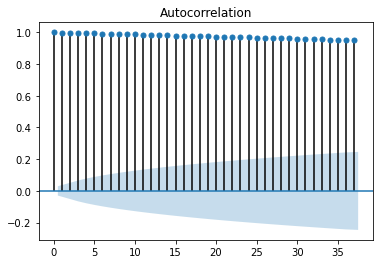

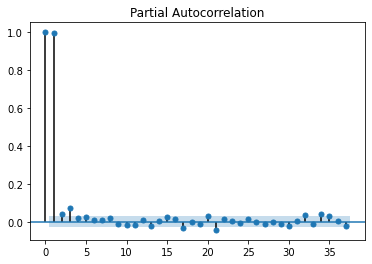

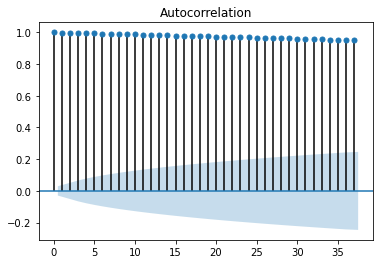

In [89]:
print('Walmart: ')
plot_pacf(train3)
plot_acf(train3)

##### 6.3.2.2 Dickey–Fuller Test - Checking for the stationarity

In [90]:
result3 = adfuller(y3)
print('ADF Statistic: {}'.format(result3[0]))
print('p-value: {}'.format(result3[1]))
print('Critical Values:')
for key, value in result3[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.6522473028539957
p-value: 0.9980061567556948
Critical Values:
	1%: -3.4315436444488125
	5%: -2.8620674719612484
	10%: -2.5670507722126836


#### 6.3.3 Return 

##### 6.3.3.1 Log Transformation 

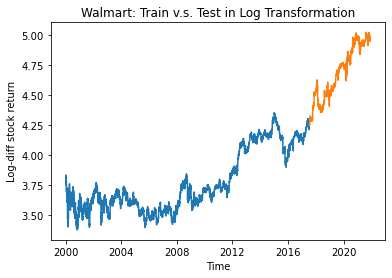

In [91]:
train_log3 = np.log(train3)
test_log3 = np.log(test3)

plt.plot(train_log3)
plt.plot(test_log3)

plt.title('Walmart: Train v.s. Test in Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

##### 6.3.3.2 Log & Time shift Transformation 

In [92]:
train_log_shift3 = train_log3 - train_log3.shift()
train_log_shift3.dropna(inplace=True)

test_log_shift3 = test_log3 - test_log3.shift()
test_log_shift3.dropna(inplace=True)

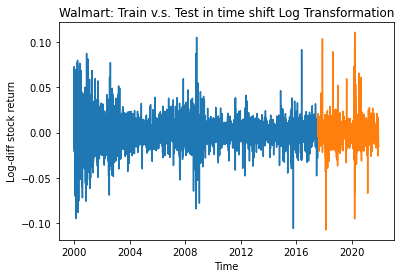

In [93]:
plt.plot(train_log_shift3)
plt.plot(test_log_shift3)

plt.title('Walmart: Train v.s. Test in time shift Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

#### 6.3.4 Run Auto ARIMA find the best model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21274.142, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22415.435, Time=1.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21276.141, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-23049.240, Time=2.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-23358.511, Time=2.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-24291.509, Time=7.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24012.176, Time=7.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-24097.627, Time=6.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-24128.696, Time=5.41 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=3.22 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 45.050 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:         

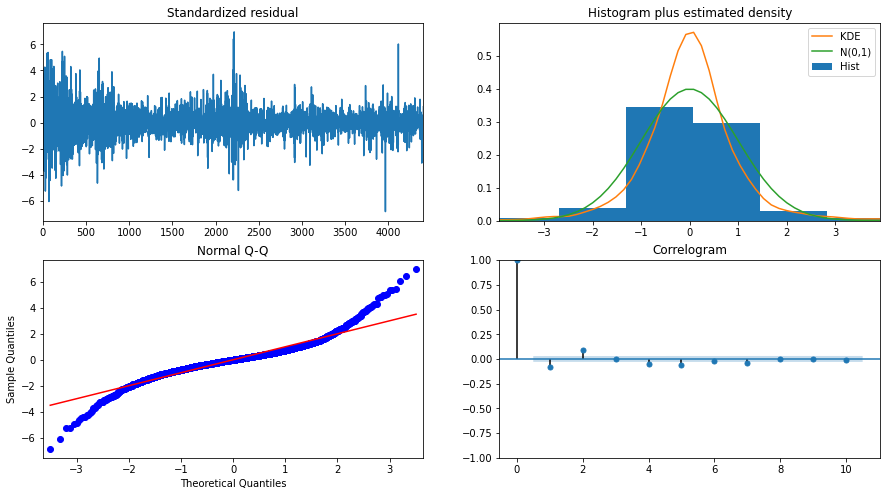

In [94]:
model_autoARIMA3 = auto_arima(train_log_shift3, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA3.summary())
model_autoARIMA3.plot_diagnostics(figsize=(15,8))
plt.show()

#### 6.3.5 Use the best model ARIMA(3,1,1) to fit the training data

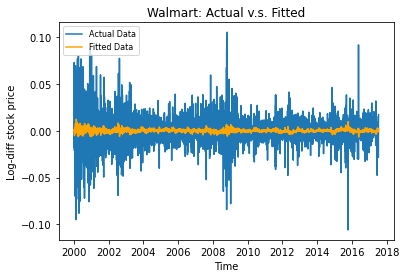

In [95]:
ARMAmodel3 = ARIMA(train_log3, order = (3, 1, 1))
prediction_model3 = ARMAmodel3.fit(disp=-1)
plt.plot(train_log_shift3,label='Actual Data')
plt.plot(prediction_model3.fittedvalues, color='orange',label='Fitted Data')

plt.title('Walmart: Actual v.s. Fitted')
plt.xlabel('Time')
plt.ylabel('Log-diff stock price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 6.3.6 Prediction and the comparation with the testing data

In [96]:
start3=len(train3)
end3=len(train3)+len(test3)-1
pred3 = prediction_model3.predict(start = start3,end=end3,dynamic= True)

In [97]:
predictions_ARIMA_diff3 = pd.Series(pred3.values, copy=True)
predictions_ARIMA_diff_cumsum3 = pred3.values.cumsum()
predictions_ARIMA_log3 = pd.Series(test_log3['wmt_AdjClose'], index=test_log3.index)
predictions_ARIMA_log3 = predictions_ARIMA_log3.add(predictions_ARIMA_diff_cumsum3, fill_value=0)
predictions_ARIMA3 = np.exp(predictions_ARIMA_log3)

In [98]:
prediction3 = pd.DataFrame(predictions_ARIMA3,index = test3.index)
prediction3.columns = ["wmt_predicted_returns"]
prediction3

,wmt_predicted_returns
Date,
2017-07-17,70.163964
2017-07-18,69.926042
2017-07-19,69.624600
2017-07-20,69.761600
2017-07-21,69.875609
...,...
2021-11-23,164.957044
2021-11-24,165.802624
2021-11-26,163.966553


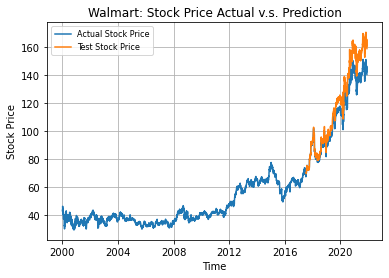

In [99]:
plt.plot(y3, label='Actual Stock Price')
plt.plot(predictions_ARIMA3,label='Test Stock Price')
plt.title('Walmart: Stock Price Actual v.s. Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

#### 6.3.7 One Month Forecasting for Future Stock Price

In [100]:
# set forecasting period
avg_trading_day_in_month = 21

#forecast log diff price using forecasting period
start3=len(train3)
end3=len(train3)+len(test3)-1 + avg_trading_day_in_month
pred3 = prediction_model3.predict(start = start3,end=end3,dynamic= True)
one_month_pred3 = pred3[len(test3):]

In [101]:
#transform log diff price into normal price

predictions_cumsum3 = one_month_pred3.values.cumsum()
prediction_log3 = []
last_log_price3 = test_log3[-1:]["wmt_AdjClose"][0]
for i in predictions_cumsum3:
    last_log_price3 += i
    prediction_log3.append(last_log_price3)
one_month_prediction_price3 = np.exp(prediction_log3)

In [102]:
# add date index
future_days3 = pd.date_range(start = "2021-12-1", periods = avg_trading_day_in_month).to_pydatetime().tolist()

#date format
date_range3 = []
for i in range(1,avg_trading_day_in_month+1):
    date_str = "2021"+"-"+"12"+"-"+str(i)
    format1 = '%Y-%m-%d'
    date_format3 = datetime.datetime.strptime(date_str, format1).date()
    date_range3.append(date_format3)

In [103]:
#show forecated value

one_month_prediction3 = pd.DataFrame(one_month_prediction_price3, index = date_range3)
one_month_prediction3.columns = ["wmt_forecast_returns"]
one_month_prediction3

,wmt_forecast_returns
2021-12-01,140.646737
2021-12-02,140.680206
2021-12-03,140.730425
2021-12-04,140.797411
2021-12-05,140.881189
2021-12-06,140.981788
2021-12-07,141.099245
2021-12-08,141.233601
2021-12-09,141.384904
2021-12-10,141.553209


In [104]:
# end one month value
one_month_end_value3 = round(one_month_prediction_price3[-1:][0],2)
print("Walmart Stock Price forecasting after one month: $", one_month_end_value3)

Walmart Stock Price forecasting after one month: $ 144.55


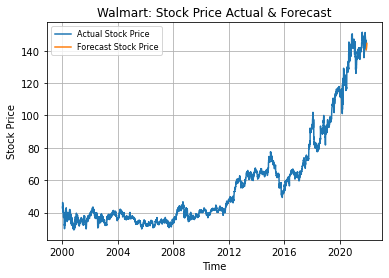

In [105]:
# plot the forecasted value with actual value

plt.plot(y3, label='Actual Stock Price')
plt.plot(one_month_prediction3, label='Forecast Stock Price')
plt.title('Walmart: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

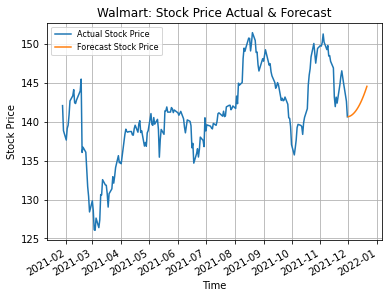

In [106]:
# larger view

plt.plot(y3[5300:], label='Actual Stock Price')
plt.plot(one_month_prediction3,label='Forecast Stock Price')
plt.title('Walmart: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

### 6.4 Pfizer

#### 6.4.1 Train test split

In [107]:
#select y data as sp adj close
y4 = df.iloc[:,[0, 7]]
y4 = y4.set_index(list(df)[0])

#set train size to 90%
len_data4 = len(y4)
n_train4 = int(len_data4 * 0.80)

#train test split
train4, test4 = y4[0:n_train4], y4[n_train4:len_data4]

#set test size
n_test4 = len(test4)

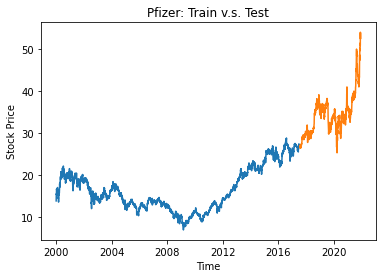

In [108]:
plt.plot(train4)
plt.plot(test4)

plt.title('Pfizer: Train v.s. Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#### 6.4.2 Making a Stationary time series data ready for forecasting 

##### 6.4.2.1 pacf and acf graph

Pfizer: 


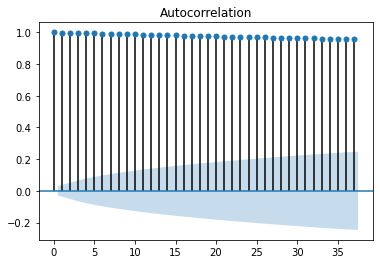

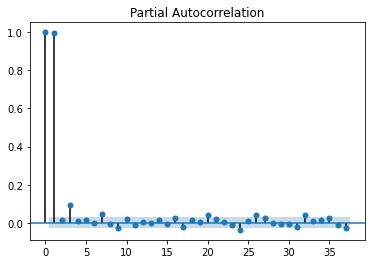

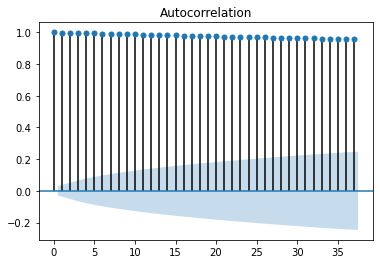

In [109]:
print('Pfizer: ')
plot_pacf(train4)
plot_acf(train4)

##### 6.4.2.2 Dickey–Fuller Test - Checking for the stationarity

In [110]:
result4 = adfuller(y4)
print('ADF Statistic: {}'.format(result4[0]))
print('p-value: {}'.format(result4[1]))
print('Critical Values:')
for key, value in result4[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.4977953845346792
p-value: 0.9975161215557595
Critical Values:
	1%: -3.4315425560386172
	5%: -2.8620669910887937
	10%: -2.5670505162286954


#### 6.4.3 Return 

##### 6.4.3.1 Log Transformation 

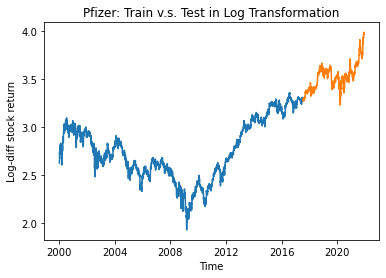

In [111]:
train_log4 = np.log(train4)
test_log4 = np.log(test4)

plt.plot(train_log4)
plt.plot(test_log4)

plt.title('Pfizer: Train v.s. Test in Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

##### 6.4.3.2 Log & Time shift Transformation 

In [112]:
train_log_shift4 = train_log4 - train_log4.shift()
train_log_shift4.dropna(inplace=True)

test_log_shift4 = test_log4 - test_log4.shift()
test_log_shift4.dropna(inplace=True)

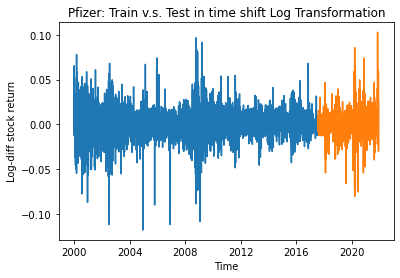

In [113]:
plt.plot(train_log_shift4)
plt.plot(test_log_shift4)

plt.title('Pfizer: Train v.s. Test in time shift Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log-diff stock return')
plt.show()

#### 6.4.4 Run Auto ARIMA find the best model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20808.110, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21853.842, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23243.349, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20810.110, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23422.741, Time=3.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-23448.087, Time=2.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-22583.091, Time=3.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-23823.541, Time=6.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-22913.579, Time=1.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-23898.107, Time=10.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-23631.031, Time=5.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-23738.194, Time=4.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-23736.275, Time=1.64 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=6.21 sec

Best model

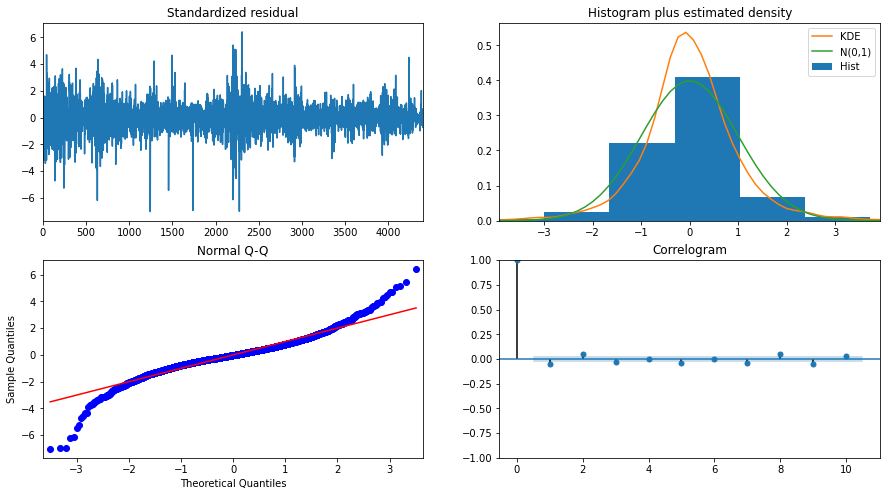

In [114]:
model_autoARIMA4 = auto_arima(train_log_shift4, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA4.summary())
model_autoARIMA4.plot_diagnostics(figsize=(15,8))
plt.show()

#### 6.4.5 Use the best model ARIMA(3,1,2) to fit the training data

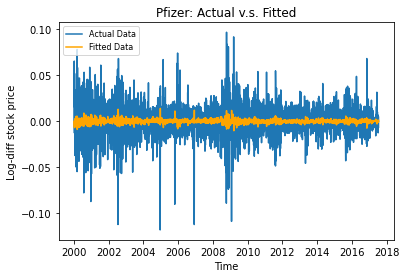

In [115]:
ARMAmodel4 = ARIMA(train_log4, order = (3, 1, 2))
prediction_model4 = ARMAmodel4.fit(disp=-1)
plt.plot(train_log_shift4,label='Actual Data')
plt.plot(prediction_model4.fittedvalues, color='orange',label='Fitted Data')

plt.title('Pfizer: Actual v.s. Fitted')
plt.xlabel('Time')
plt.ylabel('Log-diff stock price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### 6.4.6 Prediction and the comparation with the testing data

In [116]:
start4=len(train4)
end4=len(train4)+len(test4)-1
pred4 = prediction_model4.predict(start = start4, end=end4,dynamic= True)

In [117]:
predictions_ARIMA_diff4 = pd.Series(pred4.values, copy=True)
predictions_ARIMA_diff_cumsum4 = pred4.values.cumsum()
predictions_ARIMA_log4 = pd.Series(test_log4['pfe_AdjClose'], index=test_log4.index)
predictions_ARIMA_log4 = predictions_ARIMA_log4.add(predictions_ARIMA_diff_cumsum4, fill_value=0)
predictions_ARIMA4 = np.exp(predictions_ARIMA_log4)

In [118]:
prediction4 = pd.DataFrame(predictions_ARIMA4, index = test4.index)
prediction4.columns = ["pfe_predicted_returns"]
prediction4

,pfe_predicted_returns
Date,
2017-07-17,26.645777
2017-07-18,26.726752
2017-07-19,26.940630
2017-07-20,26.880322
2017-07-21,26.835233
...,...
2021-11-23,59.852322
2021-11-24,59.638332
2021-11-26,63.292135


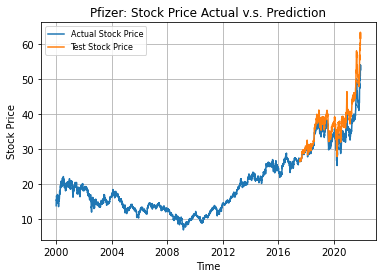

In [119]:
plt.plot(y4, label='Actual Stock Price')
plt.plot(predictions_ARIMA4,label='Test Stock Price')
plt.title('Pfizer: Stock Price Actual v.s. Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

#### 6.4.7 One Month Forecasting for Future Stock Price

In [120]:
# set forecasting period
avg_trading_day_in_month = 21

#forecast log diff price using forecasting period
start4=len(train4)
end4=len(train4)+len(test4)-1 + avg_trading_day_in_month
pred4 = prediction_model4.predict(start = start4,end=end4,dynamic= True)
one_month_pred4 = pred4[len(test4):]

In [121]:
#transform log diff price into normal price

predictions_cumsum4 = one_month_pred4.values.cumsum()
prediction_log4 = []
last_log_price4 = test_log4[-1:]["pfe_AdjClose"][0]
for i in predictions_cumsum4:
    last_log_price4 += i
    prediction_log4.append(last_log_price4)
one_month_prediction_price4 = np.exp(prediction_log4)

In [122]:
# add date index
future_days4 = pd.date_range(start = "2021-12-1", periods = avg_trading_day_in_month).to_pydatetime().tolist()

#date format
date_range4 = []
for i in range(1,avg_trading_day_in_month+1):
    date_str = "2021"+"-"+"12"+"-"+str(i)
    format1 = '%Y-%m-%d'
    date_format4 = datetime.datetime.strptime(date_str, format1).date()
    date_range4.append(date_format4)

In [123]:
#show forecated value

one_month_prediction4 = pd.DataFrame(one_month_prediction_price4, index = date_range4)
one_month_prediction4.columns = ["pfe_forecast_returns"]
one_month_prediction4

,pfe_forecast_returns
2021-12-01,53.737787
2021-12-02,53.753366
2021-12-03,53.776742
2021-12-04,53.807926
2021-12-05,53.846932
2021-12-06,53.893776
2021-12-07,53.948478
2021-12-08,54.011064
2021-12-09,54.081560
2021-12-10,54.159996


In [124]:
# end one month value
one_month_end_value4 = round(one_month_prediction_price4[-1:][0],2)
print("Pfizer Stock Price forecasting after one month: $", one_month_end_value4)

Pfizer Stock Price forecasting after one month: $ 55.56


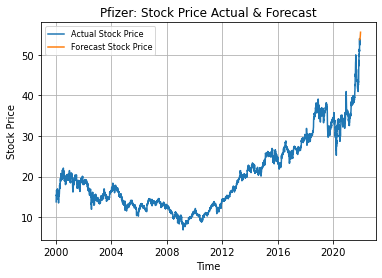

In [125]:
# plot the forecasted value with actual value

plt.plot(y4, label='Actual Stock Price')
plt.plot(one_month_prediction4, label='Forecast Stock Price')
plt.title('Pfizer: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

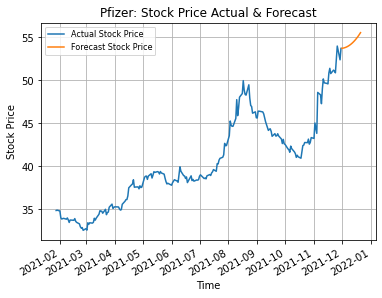

In [126]:
# larger view

plt.plot(y4[5300:], label='Actual Stock Price')
plt.plot(one_month_prediction4,label='Forecast Stock Price')
plt.title('Pfizer: Stock Price Actual & Forecast')
plt.xlabel('Time')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

In [127]:
table3 = [["Companies",'Future Stock Begin Price (1 month)','Future Stock End Price (1 month)'],
         ["Microsoft", round(one_month_prediction_price2[:1][0],2), one_month_end_value2],
         ["Walmart", round(one_month_prediction_price3[:1][0],2), one_month_end_value3],
         ["Pfizer", round(one_month_prediction_price4[:1][0],2), one_month_end_value4],
         ["S&P 500", round(one_month_prediction_price[:1][0],2), one_month_end_value]]
print(tabulate(table3,headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤══════════════════════════════════════╤════════════════════════════════════╕
│ Companies   │   Future Stock Begin Price (1 month) │   Future Stock End Price (1 month) │
╞═════════════╪══════════════════════════════════════╪════════════════════════════════════╡
│ Microsoft   │                               330.64 │                             342.09 │
├─────────────┼──────────────────────────────────────┼────────────────────────────────────┤
│ Walmart     │                               140.65 │                             144.55 │
├─────────────┼──────────────────────────────────────┼────────────────────────────────────┤
│ Pfizer      │                                53.74 │                              55.56 │
├─────────────┼──────────────────────────────────────┼────────────────────────────────────┤
│ S&P 500     │                              4567.58 │                            4703.73 │
╘═════════════╧══════════════════════════════════════╧══════════════════════════


## 7. VaR and Expected Shortfall Caculation

### 7.1 S&P 500 

#### 7.1.1 reform a new dataset: 21 days from historical price + 21 future price

In [128]:
start_date = '2021-11-01'
end_date = '2021-11-30'

#Filter data between two dates in historical data
last21 = y.loc[(y.index >= start_date) & (y.index <= end_date)]
#Remove time portion of DateTime index
last21.index = last21.index.date
#last21
one_month_prediction.columns = last21.columns
sp500_forecast = last21.append(one_month_prediction)
#OR sp500_forecast= pd.concat([last21, one_month_prediction], axis=0)
sp500_forecast = sp500_forecast.rename(columns={"sp500_AdjClose": "sp500_Price"})

# Display
sp500_forecast

,sp500_Price
2021-11-01,4613.669922
2021-11-02,4630.649902
2021-11-03,4660.569824
2021-11-04,4680.060059
2021-11-05,4697.529785
2021-11-08,4701.700195
2021-11-09,4685.250000
2021-11-10,4646.709961
2021-11-11,4649.270020
2021-11-12,4682.850098


#### 7.1.2 VaR Caculation

In [129]:
sp500_forecast1 = sp500_forecast.copy()

# horizon length (days) and VaR level
h = 21
p = 0.05

sp500_forecast1['lagClose'] = sp500_forecast1.sp500_Price.shift(1)
# Lag h Days, and drop first h days
sp500_forecast1['laghClose'] = sp500_forecast1.sp500_Price.shift(h)
sp500_forecast1 = sp500_forecast1[h:]
#sp500_forecast1

In [130]:
sp500_forecast1['ret']=np.log(sp500_forecast1['sp500_Price'])-np.log(sp500_forecast1['laghClose'])

sp500_retVec = sp500_forecast1['ret'].values
sp500_retVec

array([-0.01003938, -0.01345757, -0.01951495, -0.02317735, -0.02626467,
       -0.02638583, -0.02198698, -0.01270549, -0.01210692, -0.01802656,
       -0.01661106, -0.01893637, -0.01467118, -0.01626236, -0.01294713,
       -0.00770158, -0.00718634, -0.00717886,  0.01823457,  0.00767485,
        0.02950005])

In [131]:
#Historical VaR 
sp500_pFut = 100.*np.exp(sp500_retVec) #different from Prof.code
sp500_pStar = np.percentile(sp500_pFut,100.*p)
sp500_VaR = 100. - sp500_pStar
print('S&P500 VaR using the sampling method in 21 trading days is: {:8.9f}'.format(sp500_VaR))

S&P500 VaR using the sampling method in 21 trading days is: 2.592275455


#### 7.1.3 Expected Shortfall Caculation

In [132]:
#VaR probability level
p = 0.05 

#define price 1 day in future
sp500_pFut2 = 100.*(1.+sp500_retVec)

sp500_pStar2 = np.percentile(sp500_pFut2,100.*p)
sp500_pTilde = np.mean(sp500_pFut2[sp500_pFut2 <= sp500_pStar2])
sp500_es = 100.-sp500_pTilde
print('S&P500s one day expected shortfall in 21 trading days is: {:8.9f}'.format(sp500_es))

S&P500s one day expected shortfall in 21 trading days is: 2.632525053


### 7.2 Microsoft

#### 7.2.1 reform a new dataset: 21 days from historical price + 21 future price

In [133]:
start_date = '2021-11-01'
end_date = '2021-11-30'

#Filter data between two dates in historical data
msft_last21 = y2.loc[(y2.index >= start_date) & (y2.index <= end_date)]
#Remove time portion of DateTime index
msft_last21.index = msft_last21.index.date
#last21
one_month_prediction2.columns = msft_last21.columns
msft_forecast = msft_last21.append(one_month_prediction2)
#OR sp500_forecast= pd.concat([msft_last21, one_month_prediction2], axis=0)
msft_forecast = msft_forecast.rename(columns={"msft_AdjClose": "msft_Price"})

# Display
msft_forecast

,msft_Price
2021-11-01,328.768524
2021-11-02,332.521667
2021-11-03,333.390045
2021-11-04,335.825592
2021-11-05,335.446289
2021-11-08,336.374603
2021-11-09,335.336517
2021-11-10,330.195892
2021-11-11,331.822906
2021-11-12,336.105103


#### 7.2.2 VaR Caculation

In [134]:
msft_forecast1 = msft_forecast.copy()

# horizon length (days) and VaR level
h = 21
p = 0.05

msft_forecast1['lagClose'] = msft_forecast1.msft_Price.shift(1)
# Lag h Days, and drop first h days
msft_forecast1['laghClose'] = msft_forecast1.msft_Price.shift(h)
msft_forecast1 = msft_forecast1[h:]
#msft_forecast1

In [135]:
msft_forecast1['ret']=np.log(msft_forecast1['msft_Price'])-np.log(msft_forecast1['laghClose'])

msft_retVec = msft_forecast1['ret'].values
msft_retVec

array([ 0.00567309, -0.00538183, -0.00754565, -0.01423214, -0.01236159,
       -0.01423664, -0.01010914,  0.00652403,  0.00294151, -0.0084001 ,
       -0.0048389 , -0.01324576, -0.011999  , -0.01624567, -0.01940147,
       -0.00742645,  0.00143784,  0.00342252,  0.03089334,  0.01299316,
        0.03420852])

In [136]:
#Historical VaR 
msft_pFut = 100.*np.exp(msft_retVec) #different from Prof.code
msft_pStar = np.percentile(msft_pFut,100.*p)
msft_VaR = 100. - msft_pStar
print('S&P500 VaR using the sampling method in 21 trading days is: {:8.9f}'.format(msft_VaR))

S&P500 VaR using the sampling method in 21 trading days is: 1.611441828


#### 7.2.3 Expected Shortfall Caculation

In [137]:
#VaR probability level
p = 0.05 

#define price 1 day in future
msft_pFut2 = 100.*(1.+msft_retVec)

msft_pStar2 = np.percentile(msft_pFut2,100.*p)
msft_pTilde = np.mean(msft_pFut2[msft_pFut2 <= msft_pStar2])
msft_es = 100.- msft_pTilde
print('Microsofts one day expected shortfall in 21 trading days is: {:8.9f}'.format(msft_es))

Microsofts one day expected shortfall in 21 trading days is: 1.782356724


### 7.3 Walmart

#### 7.3.1 reform a new dataset: 21 days from historical price + 21 future price

In [138]:
start_date = '2021-11-01'
end_date = '2021-11-30'

#Filter data between two dates in historical data
wmt_last21 = y3.loc[(y3.index >= start_date) & (y3.index <= end_date)]
#Remove time portion of DateTime index
wmt_last21.index = wmt_last21.index.date
#last21
one_month_prediction3.columns = wmt_last21.columns
wmt_forecast = wmt_last21.append(one_month_prediction3)
#OR sp500_forecast= pd.concat([wmt_last21, one_month_prediction3], axis=0)
wmt_forecast = wmt_forecast.rename(columns={"wmt_AdjClose": "wmt_Price"})

# Display
wmt_forecast

,wmt_Price
2021-11-01,149.789993
2021-11-02,149.720001
2021-11-03,150.179993
2021-11-04,151.279999
2021-11-05,150.229996
2021-11-08,149.270004
2021-11-09,149.789993
2021-11-10,148.440002
2021-11-11,148.500000
2021-11-12,147.759995


#### 7.3.2 VaR Caculation

In [139]:
wmt_forecast1 = wmt_forecast.copy()

# horizon length (days) and VaR level
h = 21
p = 0.05

wmt_forecast1['lagClose'] = wmt_forecast1.wmt_Price.shift(1)
# Lag h Days, and drop first h days
wmt_forecast1['laghClose'] = wmt_forecast1.wmt_Price.shift(h)
wmt_forecast1 = wmt_forecast1[h:]
#wmt_forecast1

In [140]:
wmt_forecast1['ret']=np.log(wmt_forecast1['wmt_Price'])-np.log(wmt_forecast1['laghClose'])

wmt_retVec = wmt_forecast1['ret'].values
wmt_retVec

array([-0.06298294, -0.06227762, -0.06498835, -0.07181036, -0.06425052,
       -0.05712605, -0.05977076, -0.04976559, -0.04909897, -0.04291362,
       -0.03583583, -0.00862074,  0.00155413, -0.00533876,  0.00183893,
       -0.01290313, -0.0179697 , -0.02082224, -0.00730725,  0.01086205,
        0.02748194])

In [141]:
#Historical VaR 
wmt_pFut = 100.*np.exp(wmt_retVec) #different from Prof.code
wmt_pStar = np.percentile(wmt_pFut,100.*p)
wmt_VaR = 100. - wmt_pStar
print('Walmart VaR using the sampling method in 21 trading days is: {:8.9f}'.format(wmt_VaR))

Walmart VaR using the sampling method in 21 trading days is: 6.292161654


#### 7.3.3 Expected Shortfall Caculation

In [142]:
#VaR probability level
p = 0.05 

#define price 1 day in future
wmt_pFut2 = 100.*(1.+wmt_retVec)

wmt_pStar2 = np.percentile(wmt_pFut2,100.*p)
wmt_pTilde = np.mean(wmt_pFut2[wmt_pFut2 <= wmt_pStar2])
wmt_es = 100.- wmt_pTilde
print('Walmarts one day expected shortfall in 21 trading days is: {:8.9f}'.format(wmt_es))

Walmarts one day expected shortfall in 21 trading days is: 6.839935290


### 7.4 Pfizer

#### 7.4.1 reform a new dataset: 21 days from historical price + 21 future price

In [143]:
start_date = '2021-11-01'
end_date = '2021-11-30'

#Filter data between two dates in historical data
pfe_last21 = y4.loc[(y4.index >= start_date) & (y4.index <= end_date)]
#Remove time portion of DateTime index
pfe_last21.index = pfe_last21.index.date
#last21
one_month_prediction4.columns = pfe_last21.columns
pfe_forecast = pfe_last21.append(one_month_prediction4)
#OR sp500_forecast= pd.concat([pfe_last21, one_month_prediction4], axis=0)
pfe_forecast = pfe_forecast.rename(columns={"pfe_AdjClose": "pfe_Price"})

# Display
pfe_forecast

,pfe_Price
2021-11-01,43.260269
2021-11-02,45.054520
2021-11-03,44.430000
2021-11-04,43.849998
2021-11-05,48.610001
2021-11-08,48.330002
2021-11-09,47.299999
2021-11-10,49.020000
2021-11-11,50.180000
2021-11-12,49.730000


#### 7.4.2 VaR Caculation

In [144]:
pfe_forecast1 = pfe_forecast.copy()

# horizon length (days) and VaR level
h = 21
p = 0.05

pfe_forecast1['lagClose'] = pfe_forecast1.pfe_Price.shift(1)
# Lag h Days, and drop first h days
pfe_forecast1['laghClose'] = pfe_forecast1.pfe_Price.shift(h)
pfe_forecast1 = pfe_forecast1[h:]
#pfe_forecast1

In [145]:
pfe_forecast1['ret']=np.log(pfe_forecast1['pfe_Price'])-np.log(pfe_forecast1['laghClose'])

pfe_retVec = pfe_forecast1['ret'].values
pfe_retVec

array([0.21688178, 0.17653298, 0.19092614, 0.20464609, 0.10231614,
       0.10896247, 0.13151921, 0.09696053, 0.07487672, 0.08533419,
       0.08853834, 0.0912851 , 0.06788663, 0.05935626, 0.07346655,
       0.06794219, 0.07275245, 0.0790878 , 0.02252382, 0.05549981,
       0.03347843])

In [146]:
#Historical VaR 
pfe_pFut = 100.*np.exp(pfe_retVec) #different from Prof.code
pfe_pStar = np.percentile(pfe_pFut,100.*p)
pfe_VaR = 100. - pfe_pStar
print('Pfizer VaR using the sampling method in 21 trading days is: {:8.9f}'.format(pfe_VaR))

Pfizer VaR using the sampling method in 21 trading days is: -3.404513913


#### 7.4.3 Expected Shortfall Caculation

In [147]:
#VaR probability level
p = 0.05 

#define price 1 day in future
pfe_pFut2 = 100.*(1.+pfe_retVec)

pfe_pStar2 = np.percentile(pfe_pFut2,100.*p)
pfe_pTilde = np.mean(pfe_pFut2[pfe_pFut2 <= pfe_pStar2])
pfe_es = 100.- pfe_pTilde
print('Pfizers one day expected shortfall in 21 trading days is: {:8.9f}'.format(pfe_es))

Pfizers one day expected shortfall in 21 trading days is: -2.800112532


In [148]:
table4 = [["Companies",'VaR (1 month)','Expected Shortfall (1 month)'],
         ["Microsoft", round(msft_VaR,2), round(msft_es,2)],
         ["Walmart", round(wmt_VaR,2), round(wmt_es,2)],
         ["Pfizer", round(pfe_VaR,2), round(pfe_es,2)],
         ["S&P 500", round(sp500_VaR,2), round(sp500_es,2)]]
print(tabulate(table4,headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤═════════════════╤════════════════════════════════╕
│ Companies   │   VaR (1 month) │   Expected Shortfall (1 month) │
╞═════════════╪═════════════════╪════════════════════════════════╡
│ Microsoft   │            1.61 │                           1.78 │
├─────────────┼─────────────────┼────────────────────────────────┤
│ Walmart     │            6.29 │                           6.84 │
├─────────────┼─────────────────┼────────────────────────────────┤
│ Pfizer      │           -3.4  │                          -2.8  │
├─────────────┼─────────────────┼────────────────────────────────┤
│ S&P 500     │            2.59 │                           2.63 │
╘═════════════╧═════════════════╧════════════════════════════════╛
